# Quantifications of area and growth

## Documentation and Imports


Created on 01-04-2021

Author: Valentin Laplaud

This code is loading data from different experiment, created by ShapeQuatification. It plots those various data and compare them to each other.

In [1]:
## Clean up before script start 

for element in dir():

    if element[0:1] != "_":

        del globals()[element]

import gc
gc.collect()


print('\033[1m' + '\033[4m' + '\nRunning :  ''ExperimentComparisonNB''\n' + '\033[0m')

import datetime

# plotting stuff
import matplotlib as mpl
mpl.use('TkAgg')
%matplotlib inline

COLOR = 'white'
COLOR2 = 'black'

mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR

mpl.rcParams['figure.facecolor'] = COLOR2
mpl.rcParams['savefig.facecolor'] = COLOR2
mpl.rcParams['axes.facecolor'] = COLOR2

import matplotlib.pyplot as plt
import matplotlib.path as mpltPath
import seaborn as sns
from cycler import cycler
#Default colors
colorcycle = [plt.get_cmap('gist_rainbow')(1. * i/30) for i in range(30)]
mpl.rcParams['axes.prop_cycle'] = cycler(color=colorcycle)

# numbers handling
import numpy as np
import numpy.matlib as mtl
import pandas as pd

# signal processing 
from scipy.signal import savgol_filter, correlate, correlation_lags
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

# stats
from scipy.stats import ranksums, linregress, ks_2samp
import statsmodels.api as sm
from statsmodels.formula.api import ols

# images handling
from skimage import io
from skimage.filters import threshold_otsu, gaussian, laplace, sobel
from skimage.measure import label, regionprops, regionprops_table
from skimage.util import invert
from skimage.morphology import binary_opening, binary_closing, remove_small_holes,binary_erosion
from skimage.color import rgb2gray
from skimage.segmentation import active_contour, morphological_geodesic_active_contour,morphological_chan_vese, checkerboard_level_set, inverse_gaussian_gradient
import cv2 as cv

# to hide known warnings
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# General system functions
import os
import shutil
import sys

import time

# my functions
sys.path.append(r'd:\Users\laplaud\Desktop\PostDoc\Code\PythonFunctions/')
import VallapFunc as vf
from StatsFunctions import plotSig, Corr
from PlotFunctions import compareGrowth, compareHydroMech, GOC_Comp, sizeVar, successiveOC, PlotGrowth



Running :  ExperimentComparisonNB



## Data loading and color definition

In [2]:
%run d:\Users\laplaud\Desktop\PostDoc\Code\PythonFunctions/ExperimentList.py

Data choice made.


In [3]:
## Expe 210903
GlobalData210903_5 = pd.read_csv(P210903_5 + '\\GlobalData210903_500ulh_AreaFit.csv', index_col = 'Ind')   
GlobalData210903_1 = pd.read_csv(P210903_1 + '\\GlobalData210903_1mlh_AreaFit.csv', index_col = 'Ind')   

## Expe 210914 ctrl
# GlobalData210914_Ct = pd.read_csv(P210914_Ct + '\\GlobalData210914_Ct_AreaFit.csv', index_col = 'Ind')    
# GlobalData210914_M125 = pd.read_csv(P210914_M125 + '\\GlobalData210914_M125_AreaFit.csv', index_col = 'Ind')    

## Expe 210927
GlobalData210927_5 = pd.read_csv(P210927_5 + '\\GlobalData210927_5_AreaFit.csv', index_col = 'Ind')    
GlobalData210927_1 = pd.read_csv(P210927_1 + '\\GlobalData210927_1_AreaFit.csv', index_col = 'Ind')    

## Expe 211022
GlobalData211022_Ct2 = pd.read_csv(P211022_Ct2 + '\\GlobalData211022_Ct2_AreaFit.csv', index_col = 'Ind')    
GlobalData211022_Ct1 = pd.read_csv(P211022_Ct1 + '\\GlobalData211022_Ct1_AreaFit.csv', index_col = 'Ind')    

## Expe 211105
GlobalData211105_Degas = pd.read_csv(P211105_Degas + '\\GlobalData211105_Degas_AreaFit.csv', index_col = 'Ind')    
GlobalData211105_Deg_Bsa = pd.read_csv(P211105_Deg_Bsa + '\\GlobalData211105_Deg_Bsa_AreaFit.csv', index_col = 'Ind')    

## Expe 211222
GlobalData211222_Degas = pd.read_csv(P211222_Degas + '\\GlobalData211222_Degas_AreaFit.csv', index_col = 'Ind')    
GlobalData211222_Deg_Bsa = pd.read_csv(P211222_Deg_Bsa + '\\GlobalData211222_Deg_Bsa_AreaFit.csv', index_col = 'Ind')    

## Expe 220107
GlobalData220107_S1 = pd.read_csv(P220107_S1 + '\\GlobalData220107_S1_AreaFit.csv', index_col = 'Ind')    
GlobalData220107_S3 = pd.read_csv(P220107_S3 + '\\GlobalData220107_S3_AreaFit.csv', index_col = 'Ind')   

## Expe 220112
GlobalData220112_S1 = pd.read_csv(P220112_S1 + '\\GlobalData220112_S1_AreaFit.csv', index_col = 'Ind')    
GlobalData220112_S3 = pd.read_csv(P220112_S3 + '\\GlobalData220112_S3_AreaFit.csv', index_col = 'Ind')  

## Expe 220112
GlobalData220114_S1 = pd.read_csv(P220114_S1 + '\\GlobalData220114_S1_AreaFit.csv', index_col = 'Ind')    
GlobalData220114_S3 = pd.read_csv(P220114_S3 + '\\GlobalData220114_S3_AreaFit.csv', index_col = 'Ind')  

## Expe 220124
GlobalData220124_Ct2 = pd.read_csv(P220124_Ct2 + '\\GlobalData220124_Ct2_AreaFit.csv', index_col = 'Ind')    
GlobalData220124_Ct1 = pd.read_csv(P220124_Ct1 + '\\GlobalData220124_Ct1_AreaFit.csv', index_col = 'Ind')   

## Expe 220203 [Bad Data]
# GlobalData220203_Ct1 = pd.read_csv(P220203_Ct1 + '\\GlobalData220203_Ct1_AreaFit.csv', index_col = 'Ind')    
# GlobalData220203_Ct2 = pd.read_csv(P220203_Ct2 + '\\GlobalData220203_Ct2_AreaFit.csv', index_col = 'Ind')  

## Expe 220214   
GlobalData220214_Ct1 = pd.read_csv(P220214_Ct1 + '\\GlobalData220214_Ct1_AreaFit.csv', index_col = 'Ind') 
GlobalData220214_Ct2 = pd.read_csv(P220214_Ct2 + '\\GlobalData220214_Ct2_AreaFit.csv', index_col = 'Ind')      

## Expe 220214 Osmotic Chocs    
GlobalData220214_Ct1_Osmo = pd.read_csv(P220214_Ct1_Osmo + '\\GlobalData220214_Ct1_Osmo_AreaFit.csv', index_col = 'Ind')   
GlobalData220214_Ct2_Osmo = pd.read_csv(P220214_Ct2_Osmo + '\\GlobalData220214_Ct2_Osmo_AreaFit.csv', index_col = 'Ind')

## Expe 220301   
GlobalData220301_Ct = pd.read_csv(P220301_Ct + '\\GlobalData220301_Ct_AreaFit.csv', index_col = 'Ind') 
GlobalData220301_M100 = pd.read_csv(P220301_M100 + '\\GlobalData220301_M100_AreaFit.csv', index_col = 'Ind')      

## Expe 220301 Osmotic Chocs    
GlobalData220301_Ct_Osmo = pd.read_csv(P220301_Ct_Osmo + '\\GlobalData220301_Ct_Osmo_AreaFit.csv', index_col = 'Ind')   
GlobalData220301_M100_Osmo = pd.read_csv(P220301_M100_Osmo + '\\GlobalData220301_M100_Osmo_AreaFit.csv', index_col = 'Ind')

# Expe 220531 
GlobalData220531_Ct1 = pd.read_csv(P220531_Ct1 + '\\GlobalData220531_Ct1_AreaFit.csv', index_col = 'Ind') 
GlobalData220531_Ct2 = pd.read_csv(P220531_Ct2 + '\\GlobalData220531_Ct2_AreaFit.csv', index_col = 'Ind')      

# Expe 220531 Osmotic Chocs  
GlobalData220531_Ct1_Osmo = pd.read_csv(P220531_Ct1_Osmo + '\\GlobalData220531_Ct1_Osmo_AreaFit.csv', index_col = 'Ind')   
GlobalData220531_Ct2_Osmo = pd.read_csv(P220531_Ct2_Osmo + '\\GlobalData220531_Ct2_Osmo_AreaFit.csv', index_col = 'Ind')


## Expe 220722 ABA natalia   
GlobalData220614_Ct = pd.read_csv(P220614_Ct + '\\GlobalData220614_Ct_AreaFit.csv', index_col = 'Ind') 
GlobalData220614_ABA = pd.read_csv(P220614_ABA + '\\GlobalData220614_ABA_AreaFit.csv', index_col = 'Ind') 

## Expe 220722 ABA natalia   
GlobalData220722_Ct = pd.read_csv(P220722_Ct + '\\GlobalData220722_Ct_AreaFit.csv', index_col = 'Ind') 
GlobalData220722_ABA = pd.read_csv(P220722_ABA + '\\GlobalData220722_ABA_AreaFit.csv', index_col = 'Ind')   

## Expe 220727 Ctrl + OC
GlobalData220727_Hyper = pd.read_csv(P220727_Hyper + '\\GlobalData220727_Hyper_AreaFit.csv', index_col = 'Ind') 
GlobalData220727_Hypo = pd.read_csv(P220727_Hypo + '\\GlobalData220727_Hypo_AreaFit.csv', index_col = 'Ind')  
# GlobalData220727_Hyper_Osmo = pd.read_csv(P220727_Hyper + '\\GlobalData220727_Hyper_Osmo_AreaFit.csv', index_col = 'Ind') 
# GlobalData220727_Hypo_Osmo = pd.read_csv(P220727_Hypo_Osmo + '\\GlobalData220727_Hypo_Osmo_AreaFit.csv', index_col = 'Ind')  

## Expe 220801 Ctrl + OC
GlobalData220801_Ct1 = pd.read_csv(P220801_Ct1 + '\\GlobalData220801_Ct1_AreaFit.csv', index_col = 'Ind') 
GlobalData220801_Ct2 = pd.read_csv(P220801_Ct2 + '\\GlobalData220801_Ct2_AreaFit.csv', index_col = 'Ind') 
# GlobalData220801_Ct1_Osmo = pd.read_csv(P220801_Ct1_Osmo + '\\GlobalData220801_Ct1_Osmo_AreaFit.csv', index_col = 'Ind') 
# GlobalData220801_Ct2_Osmo = pd.read_csv(P220801_Ct2_Osmo + '\\GlobalData220801_Ct2_Osmo_AreaFit.csv', index_col = 'Ind')    

## Expe 220808
GlobalData220808_Ct = pd.read_csv(P220808_Ct + '\\GlobalData220808_Ct_AreaFit.csv', index_col = 'Ind') 
GlobalData220808_100mM = pd.read_csv(P220808_100mM + '\\GlobalData220808_100mM_AreaFit.csv', index_col = 'Ind')      

## Expe 220808 Osmotic Chocs    
GlobalData220808_Ct_Osmo = pd.read_csv(P220808_Ct_Osmo + '\\GlobalData220808_Ct_Osmo_AreaFit.csv', index_col = 'Ind')   
GlobalData220808_100mM_Osmo = pd.read_csv(P220808_100mM_Osmo + '\\GlobalData220808_100mM_Osmo_AreaFit.csv', index_col = 'Ind')

## Expe 220928 
GlobalData220928_Ct = pd.read_csv(P220928_Ct + '\\GlobalData220928_Ct_AreaFit.csv', index_col = 'Ind') 
GlobalData220928_100mM = pd.read_csv(P220928_100mM + '\\GlobalData220928_100mM_AreaFit.csv', index_col = 'Ind')      

## Expe 220928 Osmotic Chocs    
GlobalData220928_Ct_Osmo = pd.read_csv(P220928_Ct_Osmo + '\\GlobalData220928_Ct_Osmo_AreaFit.csv', index_col = 'Ind')   
GlobalData220928_100mM_Osmo = pd.read_csv(P220928_100mM_Osmo + '\\GlobalData220928_100mM_Osmo_AreaFit.csv', index_col = 'Ind')

## Expe 221025 manitol growth
GlobalData221025_Ct  = pd.read_csv(P221025_Ct + '\\GlobalData221025_Ct_AreaFit.csv', index_col = 'Ind')
GlobalData221025_100mM  = pd.read_csv(P221025_100mM + '\\GlobalData221025_100mM_AreaFit.csv', index_col = 'Ind')

##Expe 221025 manitol growth + double OC
GlobalData221025_Ct_Osmo  = pd.read_csv(P221025_Ct_Osmo + '\\GlobalData221025_Ct_Osmo_AreaFit.csv', index_col = 'Ind')
GlobalData221025_Ct_Osmo2  = pd.read_csv(P221025_Ct_Osmo2 + '\\GlobalData221025_Ct_Osmo2_AreaFit.csv', index_col = 'Ind')
GlobalData221025_100mM_Osmo = pd.read_csv(P221025_100mM_Osmo + '\\GlobalData221025_100mM_Osmo_AreaFit.csv', index_col = 'Ind')
GlobalData221025_100mM_Osmo2 = pd.read_csv(P221025_100mM_Osmo2 + '\\GlobalData221025_100mM_Osmo2_AreaFit.csv', index_col = 'Ind')

## Expe 
GlobalData221004_Ct_Osmo = pd.read_csv(P221004_Ct_Osmo + '\\GlobalData221004_Ct_Osmo_AreaFit.csv', index_col = 'Ind') 
GlobalData221004_Pase10U_Osmo = pd.read_csv(P221004_Pase10U_Osmo + '\\GlobalData221004_Pase10U_Osmo_AreaFit.csv', index_col = 'Ind')    

## Expe OC after calcium treatment 01-12-2022
GlobalData221201_Ct_Osmo = pd.read_csv(P221201_Ct_Osmo + '\\GlobalData221201_Ct_Osmo_AreaFit.csv', index_col = 'Ind') 
GlobalData221201_Ct_Osmo2 = pd.read_csv(P221201_Ct_Osmo2 + '\\GlobalData221201_Ct_Osmo2_AreaFit.csv', index_col = 'Ind') 

GlobalData221201_Calcium_100mM_Osmo = pd.read_csv(P221201_Calcium_100mM_Osmo + '\\GlobalData221201_Calcium_100mM_Osmo_AreaFit.csv', index_col = 'Ind') 
GlobalData221201_Calcium_100mM_Osmo2 = pd.read_csv(P221201_Calcium_100mM_Osmo2 + '\\GlobalData221201_Calcium_100mM_Osmo2_AreaFit.csv', index_col = 'Ind') 

## Pectinse 10U 2H
GlobalData221206_Ct_Osmo = pd.read_csv(P221206_Ct_Osmo + '\\GlobalData221206_Ct_Osmo_AreaFit.csv', index_col = 'Ind') 
GlobalData221206_Pase10U_Osmo = pd.read_csv(P221206_Pase10U_Osmo + '\\GlobalData221206_Pase10U_Osmo_AreaFit.csv', index_col = 'Ind') 

## Pectinse observation 230109
GlobalData230109_Ct = pd.read_csv(P230109_Ct + '\\GlobalData230109_Ct_AreaFit.csv', index_col = 'Ind') 
GlobalData230109_Pase5U = pd.read_csv(P230109_Pase5U + '\\GlobalData230109_Pase5U_AreaFit.csv', index_col = 'Ind')
GlobalData230109_Pase10U = pd.read_csv(P230109_Pase10U + '\\GlobalData230109_Pase10U_AreaFit.csv', index_col = 'Ind') 

## Expe 2301201 manitol growth
GlobalData230201_Ct  = pd.read_csv(P230201_Ct + '\\GlobalData230201_Ct_AreaFit.csv', index_col = 'Ind')
GlobalData230201_100mM  = pd.read_csv(P230201_100mM + '\\GlobalData230201_100mM_AreaFit.csv', index_col = 'Ind')

##Expe 2301201 manitol growth + OC
GlobalData230201_Ct_Osmo  = pd.read_csv(P230201_Ct_Osmo + '\\GlobalData230201_Ct_Osmo_AreaFit.csv', index_col = 'Ind')
GlobalData230201_100mM_Osmo = pd.read_csv(P230201_100mM_Osmo + '\\GlobalData230201_100mM_Osmo_AreaFit.csv', index_col = 'Ind')


## Expe 2301221 ABA growth
GlobalData230221_Ct  = pd.read_csv(P230221_Ct + '\\GlobalData230221_Ct_AreaFit.csv', index_col = 'Ind')
GlobalData230221_ABA  = pd.read_csv(P230221_ABA + '\\GlobalData230221_ABA_AreaFit.csv', index_col = 'Ind')

##Expe 2301201 ABA growth + OC
GlobalData230221_Ct_Osmo  = pd.read_csv(P230221_Ct_Osmo + '\\GlobalData230221_Ct_Osmo_AreaFit.csv', index_col = 'Ind')
GlobalData230221_ABA_Osmo = pd.read_csv(P230221_ABA_Osmo + '\\GlobalData230221_ABA_Osmo_AreaFit.csv', index_col = 'Ind')


now  = datetime.datetime.now()
now_str = now.strftime("%d/%m/%Y %H:%M")
print(now_str + '\nData loaded.')

03/03/2023 17:17
Data loaded.


In [4]:
# Colors

LightGreen = [0.5, 1, 0.3]
Green = [0.3, 0.7, 0.2]
DarkGreen = [0.1, 0.4, 0.1]
PastelGreen = [0.5, 1, 0.8]
DarkPastelGreen = [0.2, 0.6, 0.5]

Pink = [1, 0.3, 0.5]
Red = [0.8, 0.2, 0.2]
DarkRed = [0.6, 0.1, 0.2]

LightBlue = [0.3, 0.5, 1]
Blue = [0.2, 0.3, 0.7]
DarkBlue = [0.1, 0.1, 0.4]

DarkPurple = [0.4, 0, 0.3]
Purple = [0.55, 0, 0.45]
LightPurple = [0.8, 0, 0.7]

Yellow = [0.8, 0.8, 0.2]
DarkYellow = [0.5, 0.5, 0.2]


## Plots by experiments

### Ctrls V5

In [5]:
# #### No degas flux controls

# # ### Pool data
# GlobalData_5 = GlobalData210927_5.append(GlobalData210903_5)
# GlobalData_1 = GlobalData210927_1.append(GlobalData210903_1)

# # ### Plot
# # compareGrowth([GlobalData210903_5,GlobalData210903_1,GlobalData210927_5,GlobalData210927_1],
# #               ['500 µl/h\nN=2','1 ml/h\nN=2'],[Green, DarkGreen], PFig, 'Flux controls - Pooled',
# #               showcurve = False, showbox = False,showhist = True, nbins = 15,stats='ANOVA',
# #              groupcat = ['1_500ulh','2_1mlh','1_500ulh','2_1mlh'], diffcat = ['0309','0309','2709','2709']);

# import warnings

# warnings.filterwarnings('ignore')

# ## Ctrls gas & degas
# # compareGrowth([GlobalData211022_Ct1,GlobalData211022_Ct2],['Chamber 1\n','Chamber 2\n'],
# #          [Red, DarkRed], PFig, 'V5_Ctrls', showcurve = True, showbox = True,showhist = False, nbins = 15,stats='ranksum');

# # compareGrowth([GlobalData211105_Degas,GlobalData211222_Degas],['Degas0511\n','Degas2212\n'],
# #          [Blue, DarkBlue], PFig, 'V5_Degas_2days', showcurve = True, showbox = True,showhist = False, 
# #               nbins = 15,stats='ranksum');

# GlobalDataCtrl = GlobalData211022_Ct1.append(GlobalData211022_Ct2).append(GlobalData210927_5).append(GlobalData210903_5)
# GlobalDataDegased = GlobalData211222_Degas.append(GlobalData211105_Degas).append(GlobalData211222_Deg_Bsa).append(GlobalData211105_Deg_Bsa)

# compareGrowth([GlobalDataCtrl,GlobalDataDegased],['Ctrl\n','Degased\n'],
#            [Red, Blue], PFig, 'V5_DegasControls_Pooled', showcurve = True, showbox = True,showhist = False, nbins = 15,
#               stats='none');



### Stade comparison DV6

In [6]:
# ## Pool data

# GlobalData_S1 = GlobalData220107_S1.append(GlobalData220112_S1)
# GlobalData_S3 = GlobalData220107_S3.append(GlobalData220112_S3)

# # GlobalData_S1 = GlobalData_S1.append(GlobalData220114_S1) # Discarded data
# # GlobalData_S3 = GlobalData_S3.append(GlobalData220114_S3)

# compareGrowth([GlobalData220107_S1,GlobalData220107_S3,GlobalData220112_S1,GlobalData220112_S3],
#              ['Stade 1\nN = 2\n','Stade 3\nN=2\n'],[Yellow, DarkYellow], 
#              PFig, 'Stades 1 & 3 - Pooled - ANOVA', showcurve = False, showbox = True,stats='ANOVA',
#              groupcat = ['1_Stade1','2_Stade3','1_Stade1','2_Stade3'], diffcat = ['0701','0701','1201','1201']);

# ### Correlation with starting size
# Corr([GlobalData_S1,GlobalData_S3],['Stade1_Pooled','Stade3_Pooled'],colors = [Yellow, DarkYellow],
#          columns = ['A0fit','Area','tdeb','Tau','ChipRow'],
#          columnslabels = ['A0fit (mm²)', 'A0exp (mm²)', 'Tstart (min)', 'Tau (min)','Chip position'])


### Hyperosmotic growth V5

In [7]:
# compareGrowth([GlobalData210914_Ct,GlobalData210914_M125],['Ctrl','Manitol'],
#             [PastelGreen, DarkPastelGreen], PFig, 'V5_Manitol125', showcurve = True, showbox = True);

### Ctrls DV6 degas Stade1 (24-01-2022, 14-02-2022, )

In [8]:

# compareGrowth([GlobalData220124_Ct1,GlobalData220124_Ct2,GlobalData220214_Ct1,GlobalData220214_Ct2],
#               ['Chamber 1\nN = 2\n','Chamber 2\nN=2\n','Chamber 1\nN = 2\n','Chamber 2\nN=2\n'],[Blue, LightBlue, Green, LightGreen], 
#              PFig, 'Controls - ExpDel - ANOVA', showcurve = True, showbox = True,showhist = True, nbins = 15,indiplots = False,NimgMax = '24h',
#               stats='ANOVA',groupcat = ['1_Chamber1','2_Chamber2','1_Chamber1','2_Chamber2'], diffcat = ['0124','0124','0214','0214'])


# compareGrowth([GlobalData220214_Ct1,GlobalData220214_Ct2],['Chamber 1\n','Chamber 2\n'],[Red, DarkRed], 
#              PFig, 'Controls 14-02-2022 - ExpDel', showcurve = False, showbox = True,showhist = False, 
#               nbins = 15,indiplots = False,NimgMax = '24h',stats='ranksum')



# compareGrowth([GlobalData220124_Ct1,GlobalData220124_Ct2,GlobalData220214_Ct1,GlobalData220214_Ct2],
#               ['1_C1','1_C2','2_C1','2_C2'],[Purple,Green,Blue, Yellow], 
#              PFig, 'Controls - MixedTdeb - ranksum', showcurve = True, showbox = True,showhist = True, 
#               nbins = 15,stats='ranksum')

## Correlations of variables
# Corr([GlobalData_Ct1.append(GlobalData_Ct2)],['Controls_Pooled'],colors = [Purple],
#          columns = ['A0fit','Area','tdeb','tdeb_GR','Tau','CaracT_GR','ChipRow'],
#          columnslabels = ['A0fit (mm²)', 'A0exp (mm²)', 'Tstart (min)','Tstart_GR (min)', 'Tau (min)','Carac time GR','Chip position',],PlotFits=True)


# Corr([GlobalData_Ct1.append(GlobalData_Ct2)],['Controls_Pooled'],colors = [Purple],
#          columns = ['tdeb','CaracT_GR','tdeb_GR','Tau'],
#          columnslabels = ['Tstart (min)','Carac time GR (min)','Tstart_GR (min)', 'Tau (min)'],PlotFits=True)

# Corr([GlobalData_Ct1, GlobalData_Ct2],['Ct1', 'Ct2'],colors = [Red, Blue],
#          columns = ['tdeb','CaracT_GR','tdeb_GR','Tau'],
#          columnslabels = ['Tstart (min)','Carac time GR (min)','Tstart_GR (min)', 'Tau (min)'],PlotFits=True)

# Corr([GlobalData220124_Ct1,GlobalData220124_Ct2,GlobalData220214_Ct1,GlobalData220214_Ct2],['1_C1','1_C2','2_C1','2_C2']
#      ,colors = [Blue, Red, Green, Yellow],
#          columns = ['tdeb','CaracT_GR','tdeb_GR','Tau',],
#          columnslabels = ['Tstart (min)','Carac time GR (min)','Tstart_GR (min)', 'Tau (min)'],PlotFits=True)


### Osmotic choc correlation on Ctrls from 14-02-2022

In [9]:
# compareHydroMech([GlobalData220214_Ct1_Osmo, GlobalData220214_Ct2_Osmo],
#              ['Chamber 1','Chamber 2'],[Blue,LightBlue], 
#              PFig, 'OsmChoc_14-02-2022', showbox = True,showhist = True,stats='ranksum');

# GOC_Comp([GlobalData220214_Ct1],[GlobalData220214_Ct1_Osmo],['Tau'],
#          ['Ecomp','Erel','E','H/L_Comp','H/L_Rel','H/L'],['Tau'],['Ecomp','Erel','E','H/L_Comp','H/L_Rel','H/L'],['1402_OC_Ct1','1402_OC_Ct2'],[Purple,Red,Blue],PlotFits=True)


# compareHydroMech([GlobalData220214_Ct1_Osmo.append(GlobalData220214_Ct2_Osmo)],
#              ['Chambers pooled'],[Purple], 
#              PFig, 'OsmChoc_14-02-2022', showbox = True,showhist = False, nbins = 'auto',stats='ranksum');

# GOC_Comp([GlobalData220214_Ct1,GlobalData220214_Ct2],[GlobalData220214_Ct2_Osmo,GlobalData220214_Ct1_Osmo],['GR_end'],
#          ['1/E','1/Ecomp','1/Erel'],['GR_end'],
#          ['1/E','1/Ecomp','1/Erel'],['1402_OC_Ct1','1402_OC_Ct2'],[Purple,Red,Blue],PlotFits=False)


# GOC_Comp([GlobalData220214_Ct1,GlobalData220214_Ct2],[GlobalData220214_Ct1_Osmo,GlobalData220214_Ct2_Osmo],['GR_end'],
#          ['L/H_Comp','L/H_Rel','1/E'],['GR_end'],['L/H_Comp','L/H_Rel','1/E'],
#          ['1402_OC_Ct1','1402_OC_Ct2'],[Purple,Red,Blue],PlotFits=False)



### Growth 100mM +OC (01-03-22)

#### Growth quantif

In [10]:
# Plot 

# compareGrowth([GlobalData220301_Ct, GlobalData220301_M100],
#              ['Ctrl\n','M100\n'],[Green, DarkGreen], 
#              PFig, '100mM 0103', showcurve = True, showbox = True,showhist = False, nbins = 15,stats='ranksum');

# sizeVar([GlobalData220301_Ct, GlobalData220301_M100],['Ctrl','M100'], '100mM 0103',[Green, DarkGreen],
#         showcurve = True, showbox = True,showhist = False, nbins = 15, pooledGraph = True)

#### OC correlation

In [11]:
# compareHydroMech([GlobalData220301_Ct_Osmo,GlobalData220301_M100_Osmo],
#              ['Ctrl','Manitol 100mM'],[Green, DarkGreen], 
#              PFig, 'OsmChoc 01-03-2022', showbox = True,showhist = True,stats='ranksum');

# GOC_Comp(GlobalData220301_Ct,GlobalData220301_Ct_Osmo,['Tau','Tau10h'],
#          ['K','L'],['Tau','Tau10h'],
#          ['Module K (MPa)','Hydraulic permitivity (m.s-1.Pa-1)','Tau growth (min)', 'Tau growth 10 last hours (min)'],
#          '0103_Ctrl_OC',[PastelGreen],PlotFits=True)

# GOC_Comp(GlobalData220301_M100,GlobalData220301_M100_Osmo,['Tau','Tau10h'],
#          ['K','L'],['Tau','Tau10h'],
#          ['Module K (MPa)','Hydraulic permitivity (m.s-1.Pa-1)','Tau growth (min)', 'Tau growth 10 last hours (min)'],
#          '0103_100mM_OC',[DarkPastelGreen],PlotFits=True)

# GOC_Comp([GlobalData220301_Ct,GlobalData220301_M100],[GlobalData220301_Ct_Osmo,GlobalData220301_M100_Osmo],['GR_end'],
#          ['L/H_Comp','L/H_Rel','1/E'],['GR_end'],['L/H_Comp','L/H_Rel','1/E'],
#          ['1402_OC_Ct1','1402_OC_Ct2'],[Purple,Red,Blue],PlotFits=False)

### Growth DV7 (27-07-2022)

#### Growth

In [12]:
# compareGrowth([GlobalData220727_Hyper,GlobalData220727_Hypo],
#              ['Ctrl1\n','Ctrl2\n'],[Blue, DarkBlue], 
#              PFig, '220727_Ctrls', showcurve = True, showbox = True,showhist = True, nbins = 15,stats='ranksum');

# sizeVar([GlobalData220727_Hyper,GlobalData220727_Hypo],['Ctrl1\n','Ctrl2\n'],'220727_Ctrls',[Blue, DarkBlue],
#         showcurve = True, showbox = True,showhist = False, nbins = 15, pooledGraph = True)

### Natalia's experiments

#### 22-06-14 (ABA 3.5µM)

In [13]:
# compareGrowth([GlobalData220614_Ct, GlobalData220614_ABA],
#              ['Ctrl\n','ABA 3.5 µM\n'],[Red,DarkRed],PFig, '220614_ABA',NimgMax = 'max',
#               showcurve = True, showbox = True,showhist = True, nbins = 15,stats='ranksum');

# sizeVar([GlobalData220614_Ct, GlobalData220614_ABA],['Ctrl','ABA 3.5 µM'], '220614_ABA',[Red,DarkRed],
#         showcurve = True, showbox = True,showhist = False, nbins = 15, pooledGraph = True)

#### 22-07-22 (ABA 3.5µM)

In [14]:
# compareGrowth([GlobalData220722_Ct, GlobalData220722_ABA],
#              ['Ctrl\n','ABA 3.5 µM\n'],[Red,DarkRed],PFig, '220722_ABA',NimgMax = 'max',
#               showcurve = True, showbox = True,showhist = True, nbins = 15,stats='ranksum');


# sizeVar([GlobalData220722_Ct, GlobalData220722_ABA],['Ctrl','ABA 3.5 µM'], '220722_ABA',[Red,DarkRed],
#         showcurve = True, showbox = True,showhist = False, nbins = 15, pooledGraph = True)

#### All together

In [15]:
# compareGrowth([GlobalData220722_Ct, GlobalData220722_ABA,GlobalData220614_Ct, GlobalData220614_ABA],
#              ['Ctrl\n','ABA 3.5 µM\n','Ctrl\n','ABA 3.5 µM\n'],[Red,DarkRed,LightPurple,Purple],PFig, 'ABA_Growth',NimgMax = 'max',
#               showcurve = True, showbox = True,showhist = True, nbins = 15,stats='ranksum',sigpairs=[(0,1),(2,3)]);

### Ctrls DV7 (31/05/2022)

#### Growth

In [16]:

# compareGrowth([GlobalData220531_Ct1, GlobalData220531_Ct2],['3105_Ct1\n','3105_Ct2\n'],[Yellow, DarkYellow],
#              PFig, 'Controls 310522', showcurve = True, showbox = True,showhist = True, nbins = 15,stats='ranksum');

# sizeVar([GlobalData220531_Ct1, GlobalData220531_Ct2],['3105_Ct1','3105_Ct2'], 'Controls 310522',[Yellow, DarkYellow],
#         showcurve = True, showbox = True,showhist = False, nbins = 15, pooledGraph = True)

#### OC

In [17]:
# compareHydroMech([GlobalData220531_Ct1_Osmo, GlobalData220531_Ct2_Osmo],
#              ['220531_Ct1','220531_Ct2'],[Red,DarkRed], 
#              PFig, 'OsmChoc_31-05-2022', showbox = True,showhist = True,stats='ranksum');

# compareHydroMech([GlobalData220214_Ct1_Osmo.append(GlobalData220214_Ct2_Osmo).append(GlobalData220531_Ct1_Osmo).append(GlobalData220531_Ct2_Osmo).append(GlobalData220801_Ct1_Osmo)],
#              ['AllChocs'],[Red,DarkRed], 
#              PFig, 'OsmChoc_All', showbox = True,showhist = True,stats='ranksum');

# GOC_Comp([GlobalData220531_Ct1,GlobalData220531_Ct2],[GlobalData220531_Ct1_Osmo,GlobalData220531_Ct2_Osmo],
#          ['GR_end'],['1/E','1/Ecomp','1/Erel'],['GR_end'],['1/E','1/Ecomp','1/Erel'],
#          ['220531_Ct1','220531_Ct2'],[Purple,Red,Blue],PlotFits=True)


# GOC_Comp([GlobalData220531_Ct1,GlobalData220531_Ct2],[GlobalData220531_Ct1_Osmo,GlobalData220531_Ct2_Osmo],
#          ['GR_end'],['TauFlux','TauFluxRel','L/H_Comp','L/H_Rel'],['GR_end'],['TauFlux','TauFluxRel','L/H_Comp','L/H_Rel'],
#          ['220531_Cts'],[Purple,Red,Blue],PlotFits=True)


### Ctrls DV7 (01/08/2022)

#### Growth

In [18]:
# GlobalData_Ct  = GlobalData220124_Ct1.append(GlobalData220214_Ct2.append(GlobalData220214_Ct1)).append(GlobalData220124_Ct2)


# compareGrowth([GlobalData_Ct, GlobalData220801_Ct1],
#              ['Old data\n','0108_Ct1\n'],[Blue, Green, DarkGreen],PFig, 'Controls 010822', 
#               showcurve = True, showbox = True,showhist = True, nbins = 15,stats='ranksum',NimgMax = '24h');

# compareGrowth([GlobalData_Ct, GlobalData220801_Ct1, GlobalData220801_Ct2],
#              ['Old data\n','0108_Ct1\n','0108_Ct2\n'],[Blue, Green, DarkGreen], 
#              PFig, 'Controls 010822', showcurve = True, showbox = True,showhist = True, nbins = 15,stats='ranksum');


#### OC

In [19]:
# compareHydroMech([GlobalData220531_Ct1_Osmo.append(GlobalData220531_Ct2_Osmo),GlobalData220801_Ct1_Osmo.append(GlobalData220801_Ct2_Osmo)],
#              ['220531','220801'],[Blue,DarkRed], 
#              PFig, 'OsmChoc_All', showbox = True,showhist = False,stats='ranksum');

# GOC_Comp([GlobalData220214_Ct1,GlobalData220214_Ct2,GlobalData220531_Ct1,GlobalData220531_Ct2,GlobalData220801_Ct1],
#          [GlobalData220214_Ct1_Osmo,GlobalData220214_Ct2_Osmo,GlobalData220531_Ct1_Osmo,GlobalData220531_Ct2_Osmo,GlobalData220801_Ct1_Osmo],
#          ['GR_end'],['Ecomp','Erel'],['GR_end'],['Ecomp','Erel'],
#          ['220531_Ct1','220531_Ct2','220801_Ct1','220801_Ct2'],['gray',LightBlue,DarkBlue,Pink,DarkRed],PlotFits=True)

# compareHydroMech([GlobalData220801_Ct1_Osmo, GlobalData220801_Ct2_Osmo],
#              ['220801_Ct1','220801_Ct2'],[Red,DarkRed], 
#              PFig, 'OsmChoc_01-08-2022', showbox = True,showhist = False,stats='ranksum');

# GOC_Comp([GlobalData220801_Ct1,GlobalData220801_Ct2],[GlobalData220801_Ct1_Osmo,GlobalData220801_Ct2_Osmo],
#          ['GR_end'],['1/E','1/Ecomp','1/Erel'],['GR_end'],['1/E','1/Ecomp','1/Erel'],
#          ['220801_Ct1','220801_Ct2'],[Purple,Red,Blue],PlotFits=True)

### Growth 100mM + OC (08-08-2022, 28-09-2022, 25-10-2022, 01-02-2023)

#### Growth quantif

In [20]:
# compareGrowth([GlobalData220808_Ct, GlobalData220808_100mM],
#              ['Ctrl\n','M100\n'],[Red, DarkRed], 
#              PFig, '100mM 0808', showcurve = True, showbox = True,showhist = True, nbins = 15,stats='ranksum');

# compareGrowth([GlobalData220928_Ct, GlobalData220928_100mM],
#              ['Ctrl\n','M100\n'],[Green, DarkGreen], 
#              PFig, '100mM 0928', showcurve = True, showbox = True,showhist = True, nbins = 15,stats='ranksum');

# sizeVar([GlobalData220928_Ct, GlobalData220928_100mM],['Ctrl\n','M100\n'], '100mM 0928',[Purple, DarkPurple],
#         showcurve = True, showbox = True,showhist = False, nbins = 15, pooledGraph = True)

# compareGrowth([GlobalData221025_Ct, GlobalData221025_100mM],
#              ['Ctrl\n','M100\n'],[Blue, DarkBlue], 
#              PFig, '100mM 1025', showcurve = True, showbox = True,showhist = False, nbins = 15,stats='ranksum');




# compareGrowth([GlobalData230201_Ct, GlobalData230201_100mM],
#              ['Ctrl\n','M100\n'],[Yellow, DarkYellow], 
#              PFig, '100mM 0201', showcurve = True, showbox = True,showhist = False, nbins = 15,stats='ranksum');




# compareGrowth([GlobalData230201_Ct,GlobalData230201_100mM, GlobalData220928_Ct, GlobalData220928_100mM],
#              ['Ctrl\n','M100\n','Ctrl\n','M100\n'],[Yellow, DarkYellow,Green, DarkGreen], 
#              PFig, '100mM 0201', showcurve = True, showbox = True,showhist = True, nbins = 15,stats='ranksum',
#               sigpairs=[(0,1),(2,3)]);

# compareGrowth([GlobalData220301_Ct, GlobalData220301_M100,GlobalData220808_Ct, GlobalData220808_100mM,
#                GlobalData220928_Ct, GlobalData220928_100mM,GlobalData221025_Ct, GlobalData221025_100mM,
#               GlobalData230201_Ct,GlobalData230201_100mM],
#              ['C0301\n','M0301\n','C0808\n','M0808\n','C0928\n','M0928\n',
#               'C1025\n','M1025\n','C0201\n','M0201\n'],
#               [Red,DarkRed,Green, DarkGreen,
#                Blue, DarkBlue,Purple, DarkPurple, Yellow,DarkYellow], 
#              PFig, '100mM_pooled', showcurve = False, showbox = True,showhist = False, nbins = 15,stats='ranksum',
#              sigpairs = [(0,1),(2,3),(4,5),(6,7),(8,9)]);


#### OC correlation

In [21]:
# compareHydroMech([GlobalData220808_Ct_Osmo,GlobalData220808_100mM_Osmo],
#              ['Ctrl','Manitol 100mM'],[Red, DarkRed], 
#              PFig, 'OsmChoc 0808', showbox = True,showhist = True,stats='ranksum');


# compareHydroMech([GlobalData220928_Ct_Osmo,GlobalData220928_100mM_Osmo],
#              ['Ctrl','Manitol 100mM'],[Green, DarkGreen], 
#              PFig, 'OsmChoc 0928', showbox = True,showhist = True,stats='ranksum');



# compareHydroMech([GlobalData221025_Ct_Osmo,GlobalData221025_100mM_Osmo],
#              ['Ctrl','Manitol 100mM'],[Green, DarkGreen], 
#              PFig, 'OsmChoc 1025', showbox = True,showhist = True,stats='ranksum');


# compareHydroMech([GlobalData230201_Ct_Osmo,GlobalData230201_100mM_Osmo],
#              ['Ctrl','Manitol 100mM'],[Yellow,DarkYellow], 
#              PFig, 'OsmChoc 0201', showbox = True,showhist = True,stats='ranksum');




# compareHydroMech([GlobalData220301_Ct_Osmo, GlobalData220301_M100_Osmo,GlobalData220808_Ct_Osmo, GlobalData220808_100mM_Osmo,
#                GlobalData220928_Ct_Osmo, GlobalData220928_100mM_Osmo,GlobalData221025_Ct_Osmo, GlobalData221025_100mM_Osmo,
#               GlobalData230201_Ct_Osmo,GlobalData230201_100mM_Osmo],
#              ['C0301\n','M0301\n','C0808\n','M0808\n','C0928\n','M0928\n',
#               'C1025\n','M1025\n','C0201\n','M0201\n'],
#               [Red,DarkRed,Green, DarkGreen,
#                Blue, DarkBlue,Purple, DarkPurple, Yellow,DarkYellow], 
#              PFig, 'OsmChoc 0201', showbox = True,showhist = False,stats='ranksum',sigpairs = [(0,1),(2,3),(4,5),(6,7),(8,9)]);

# GOC_Comp([GlobalData220808_Ct, GlobalData220808_100mM,
#                GlobalData220928_Ct, GlobalData220928_100mM,GlobalData221025_Ct, GlobalData221025_100mM,
#               GlobalData230201_Ct,GlobalData230201_100mM],
#          [GlobalData220808_Ct_Osmo, GlobalData220808_100mM_Osmo,
#                GlobalData220928_Ct_Osmo, GlobalData220928_100mM_Osmo,GlobalData221025_Ct_Osmo, GlobalData221025_100mM_Osmo,
#               GlobalData230201_Ct_Osmo,GlobalData230201_100mM_Osmo],
#          ['GR_end','Tau','tdeb'],['Ecomp','Erel'],['GR_end','Tau','tdeb'],['E','Erel'],
#              ['C0808\n','M0808\n','C0928\n','M0928\n',
#               'C1025\n','M1025\n','C0201\n','M0201\n'],['gray',Green, DarkGreen,
#                Blue, DarkBlue,Purple, DarkPurple, Yellow,DarkYellow],PlotFits=True,PlotStats=True,
#          Norm=False,PooledOnly=True,CorrType = 'pearson')




# GOC_Comp([GlobalData220301_Ct, GlobalData220301_M100,
#                GlobalData220928_Ct, GlobalData220928_100mM,GlobalData221025_Ct, GlobalData221025_100mM],
#          [GlobalData220301_Ct_Osmo, GlobalData220301_M100_Osmo,
#                GlobalData220928_Ct_Osmo, GlobalData220928_100mM_Osmo,
#           GlobalData221025_Ct_Osmo, GlobalData221025_100mM_Osmo],
#          ['GR_end'],['Ecomp','Erel'],['GR_end'],['Ecomp','Erel'],
#              ['C0301\n','M0301\n','C0928\n','M0928\n',
#               'C1025\n','M1025\n'],['gray',Red,DarkRed,
#                Blue, DarkBlue,Purple, DarkPurple],PlotFits=True)


# GOC_Comp([GlobalData220301_Ct, GlobalData220301_M100],
#          [GlobalData220301_Ct_Osmo, GlobalData220301_M100_Osmo],
#          ['GR_end'],['Ecomp','Erel'],['GR_end'],['Ecomp','Erel'],
#              ['C0301\n','M0301\n'],['gray',Red,DarkRed],PlotFits=True)

# GOC_Comp([GlobalData221025_Ct, GlobalData221025_100mM],
#          [GlobalData221025_Ct_Osmo, GlobalData221025_100mM_Osmo],
#          ['GR_end'],['Ecomp','Erel'],['GR_end'],['Ecomp','Erel'],
#              ['C0301\n','M0301\n','C0928\n','M0928\n',
#               'C1025\n','M1025\n'],['gray',Purple, DarkPurple],PlotFits=True)

# GOC_Comp([GlobalData220928_100mM],
#          [GlobalData220928_100mM_Osmo],
#          ['GR_end'],['Ecomp','Erel'],['GR_end'],['Ecomp','Erel'],
#          ['M100_0201\n'],['gray',DarkYellow],PlotFits=True)





# GOC_Comp([GlobalData230201_Ct,GlobalData230201_100mM,GlobalData220928_Ct, GlobalData220928_100mM],
#          [GlobalData230201_Ct_Osmo,GlobalData230201_100mM_Osmo,GlobalData220928_Ct_Osmo,GlobalData220928_100mM_Osmo],
#          ['GR_end'],['Ecomp','Erel','GR_AfterOC'],['GR_end'],['Ecomp','Erel','GR_AfterOC'],
#          ['Ctrl_0201\n','M100_0201\n','Ctrl_0928\n','M100_0928\n'],['gray', Yellow,DarkYellow,Blue, DarkBlue],PlotFits=True)

# GOC_Comp([GlobalData230201_Ct,GlobalData230201_100mM,GlobalData220928_Ct, GlobalData220928_100mM],
#          [GlobalData230201_Ct_Osmo,GlobalData230201_100mM_Osmo,GlobalData220928_Ct_Osmo,GlobalData220928_100mM_Osmo],
#          ['GR_end'],['Ecomp','Erel'],['GR_end'],['Ecomp','Erel'],
#          ['Ctrl_0201\n','M100_0201\n','Ctrl_0928\n','M100_0928\n'],['gray',Yellow, DarkYellow,Blue, DarkBlue],PlotFits=True)







# GOC_Comp([GlobalData221025_Ct,GlobalData221025_100mM,GlobalData220928_Ct, GlobalData220928_100mM],
#          [GlobalData221025_Ct_Osmo,GlobalData221025_100mM_Osmo,GlobalData220928_Ct_Osmo,GlobalData220928_100mM_Osmo],
#          ['GR_end'],['Ecomp','Erel'],['GR_end'],['Ecomp','Erel'],
#          ['Ctrl_1025\n','M100_1025\n','Ctrl_0928\n','M100_0928\n'],['gray',Green, DarkGreen,Blue, DarkBlue],PlotFits=True)

### 04-10-2022 : OC after pectinase treatment 

In [22]:
# compareHydroMech([GlobalData221004_Ct_Osmo,GlobalData221004_Pase10U_Osmo],
#              ['1004_Ctrl','1004_Pase10U'],['g','r'], 
#              PFig, 'OsmChoc_Pase', showbox = True,showhist = True,stats='ranksum');

### 25-10-2022 : Successive OC 

In [23]:
# compareHydroMech([GlobalData221025_Ct_Osmo,GlobalData221025_Ct_Osmo2],
#              ['Ctrl_OC1','Ctrl_OC2'],[Green, DarkGreen], 
#              PFig, 'OsmChoc2 1025', showbox = True,showhist = True,stats='ranksum');


# successiveOC(GlobalData221025_Ct_Osmo,GlobalData221025_Ct_Osmo2)



# GlobalData221025_Ct_Osmo2.loc[:,'Ecomp2'] = GlobalData221025_Ct_Osmo2.loc[:,'Ecomp'] 
# GlobalData221025_Ct_Osmo2.loc[:,'Erel2'] = GlobalData221025_Ct_Osmo2.loc[:,'Erel'] 

# GlobalData221025_Ct_Osmo2 =GlobalData221025_Ct_Osmo2.drop(columns=['Ecomp','Erel'])


# GOC_Comp([GlobalData221025_Ct_Osmo],[GlobalData221025_Ct_Osmo2],
#          ['Ecomp','Erel'],['Ecomp','Erel'],['Ecomp_1','Erel_1'],['Ecomp_2','Erel_2'],
#          ['Ctrl_OC1','Ctrl_OC2'],[DarkGreen, DarkBlue],PlotFits=True)

### 01-12-2022 : OC on calcium treated + successive

In [24]:
# compareHydroMech([GlobalData221201_Ct_Osmo,GlobalData221201_Calcium_100mM_Osmo],
#              ['Ctrl','Calcium 100mM'],[Green, Yellow], 
#              PFig, 'OsmChoc 0112', showbox = True,showhist = True,stats='ranksum');


# successiveOC(GlobalData221201_Ct_Osmo,GlobalData221201_Ct_Osmo2)


# compareHydroMech([GlobalData221201_Ct_Osmo,GlobalData221201_Ct_Osmo2],
#              ['Ctrl_OC1','Ctrl_OC2'],[Green, DarkGreen], 
#              PFig, 'OsmChocSucc 0112', showbox = True,showhist = True,stats='ranksum');

# compareHydroMech([GlobalData221201_Calcium_100mM_Osmo,GlobalData221201_Calcium_100mM_Osmo2],
#              ['Calc_OC1','Calc_OC2'],[Green, DarkGreen], 
#              PFig, 'OsmChocSuccCalc 0112', showbox = True,showhist = True,stats='ranksum');

### 06-12-2022 : OC after pectinase treatment 

#### Growth 4h before

In [25]:

# GlobalData221206_Ct = pd.read_csv(P221206_Ct + '\\GlobalData221206_Ct_AreaCont.csv', index_col = 'Ind') 
# GlobalData221206_Pase10U = pd.read_csv(P221206_Pase10U + '\\GlobalData221206_Pase10U_AreaCont.csv', index_col = 'Ind') 



In [26]:
              
# PlotGrowth([GlobalData221206_Ct,GlobalData221206_Pase10U],4,['Ctrl','Pectinase (img8)'])

#### Mechanics

d:\Users\laplaud\Desktop\PostDoc\Code\PythonFunctions\PlotFunctions.py:783: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig20.tight_layout()


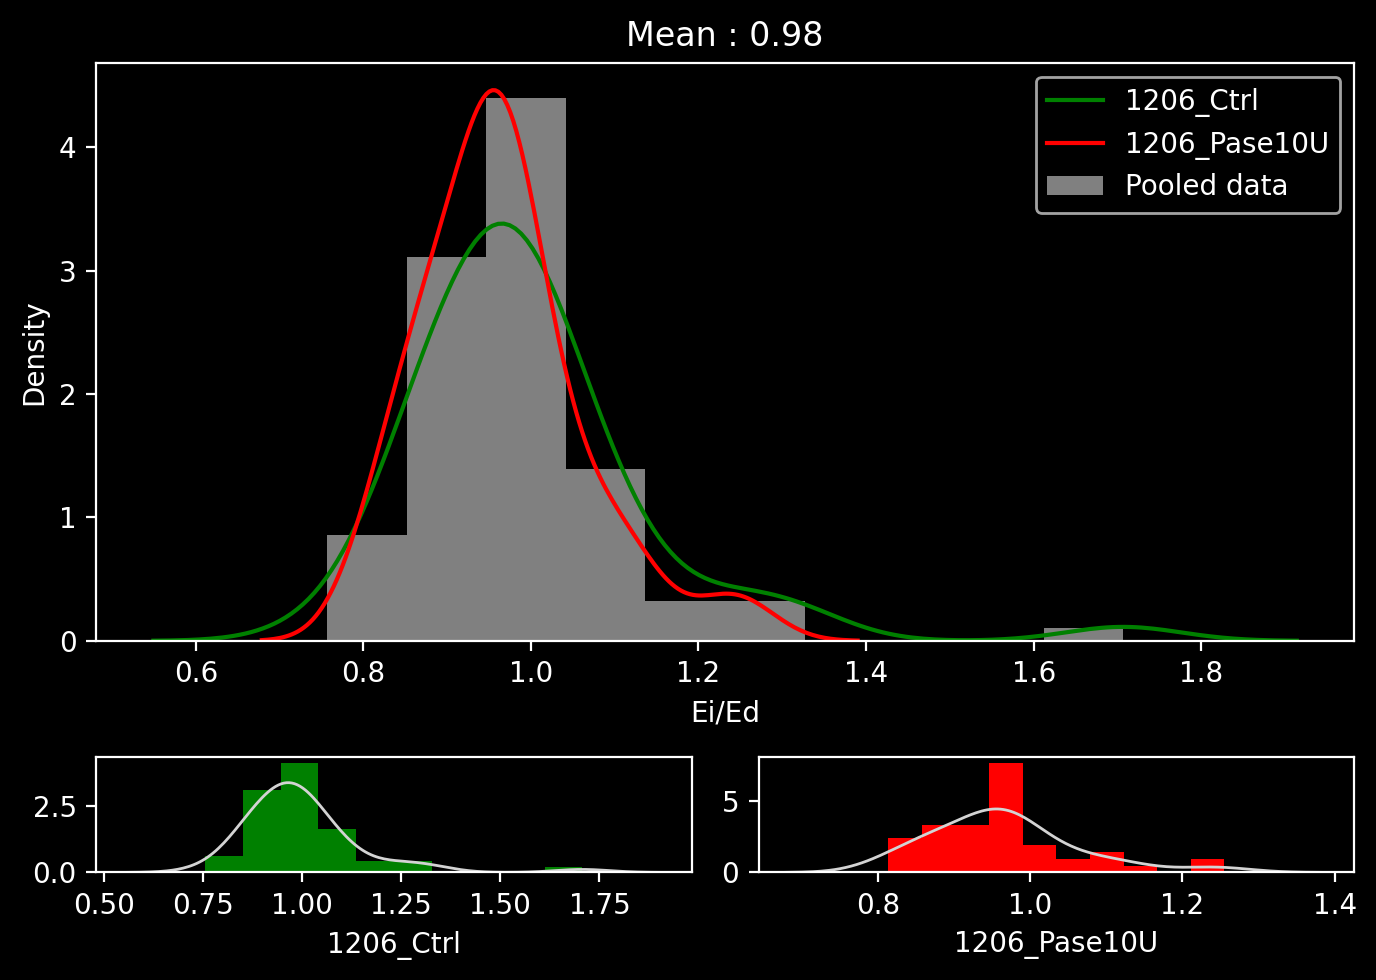

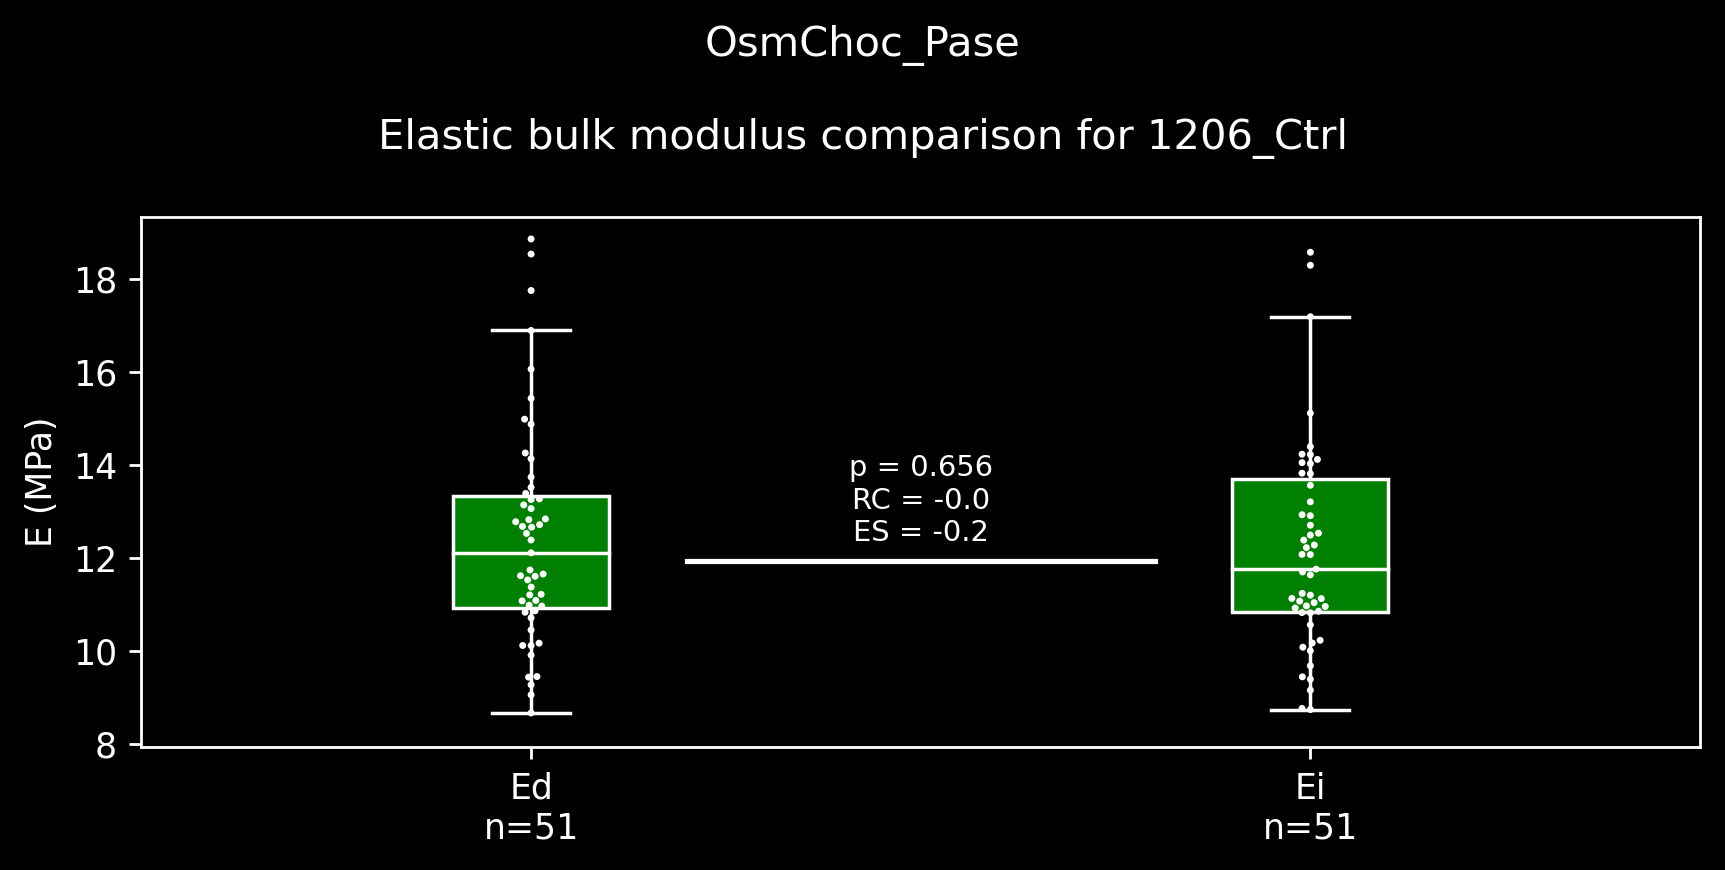

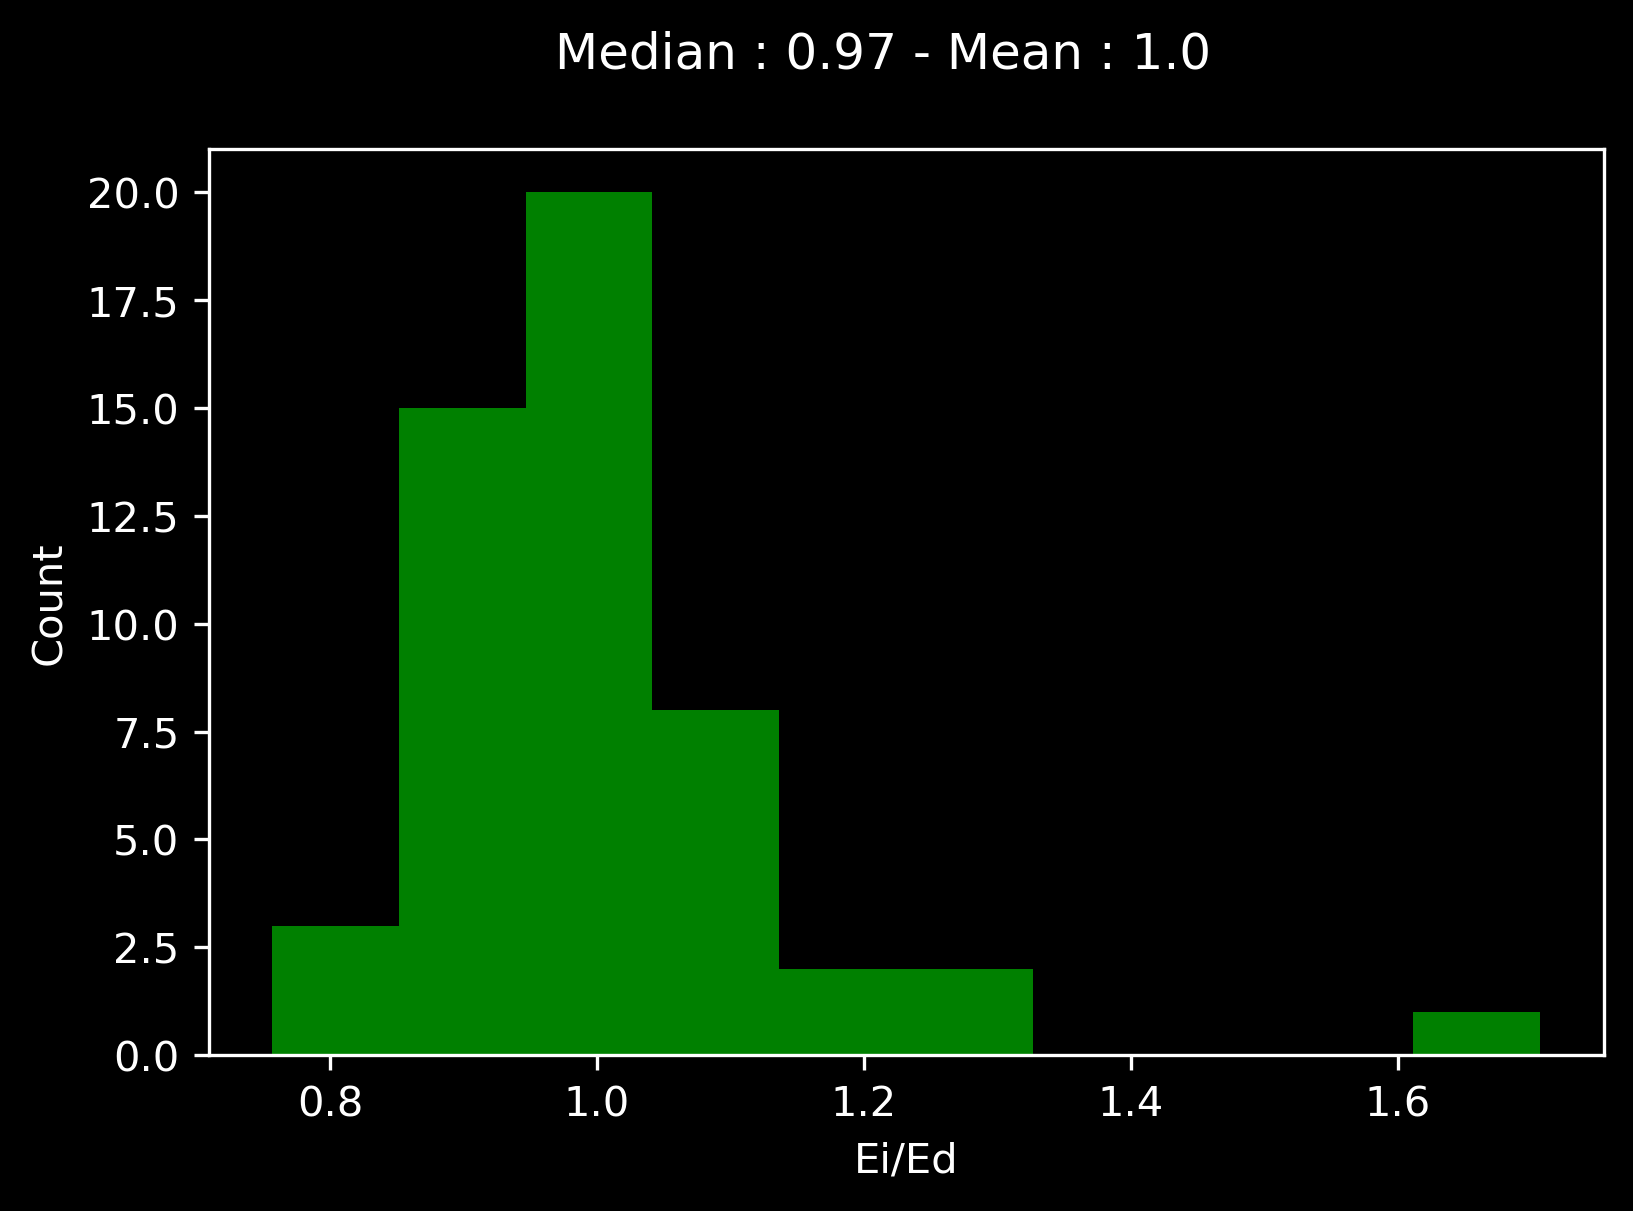

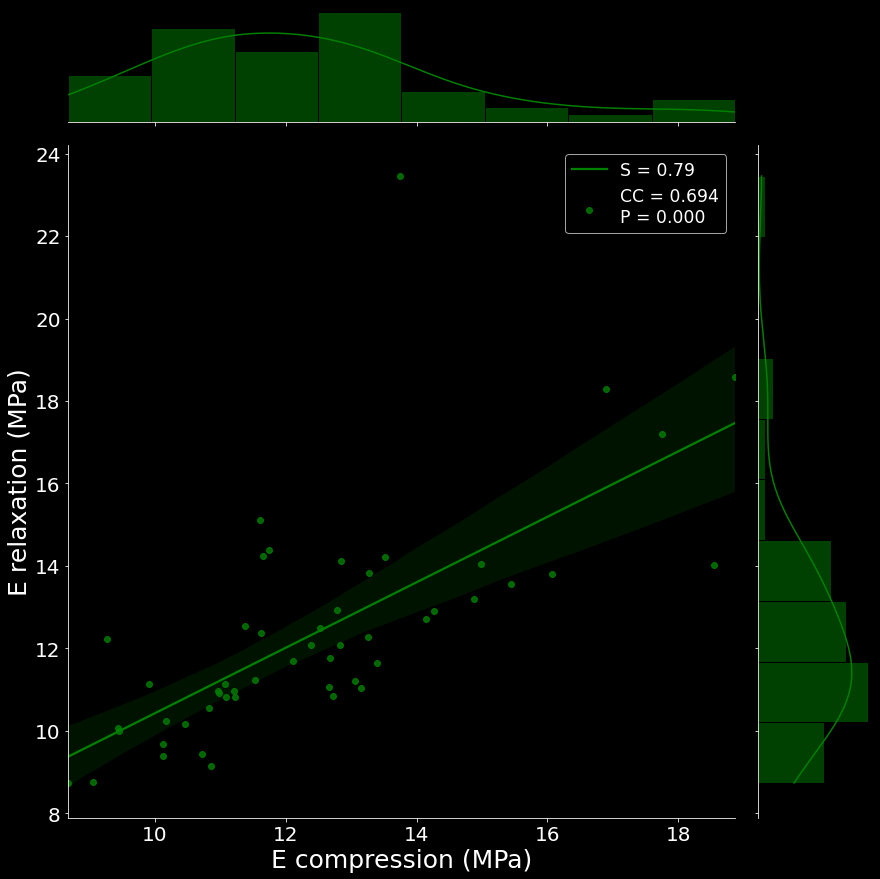

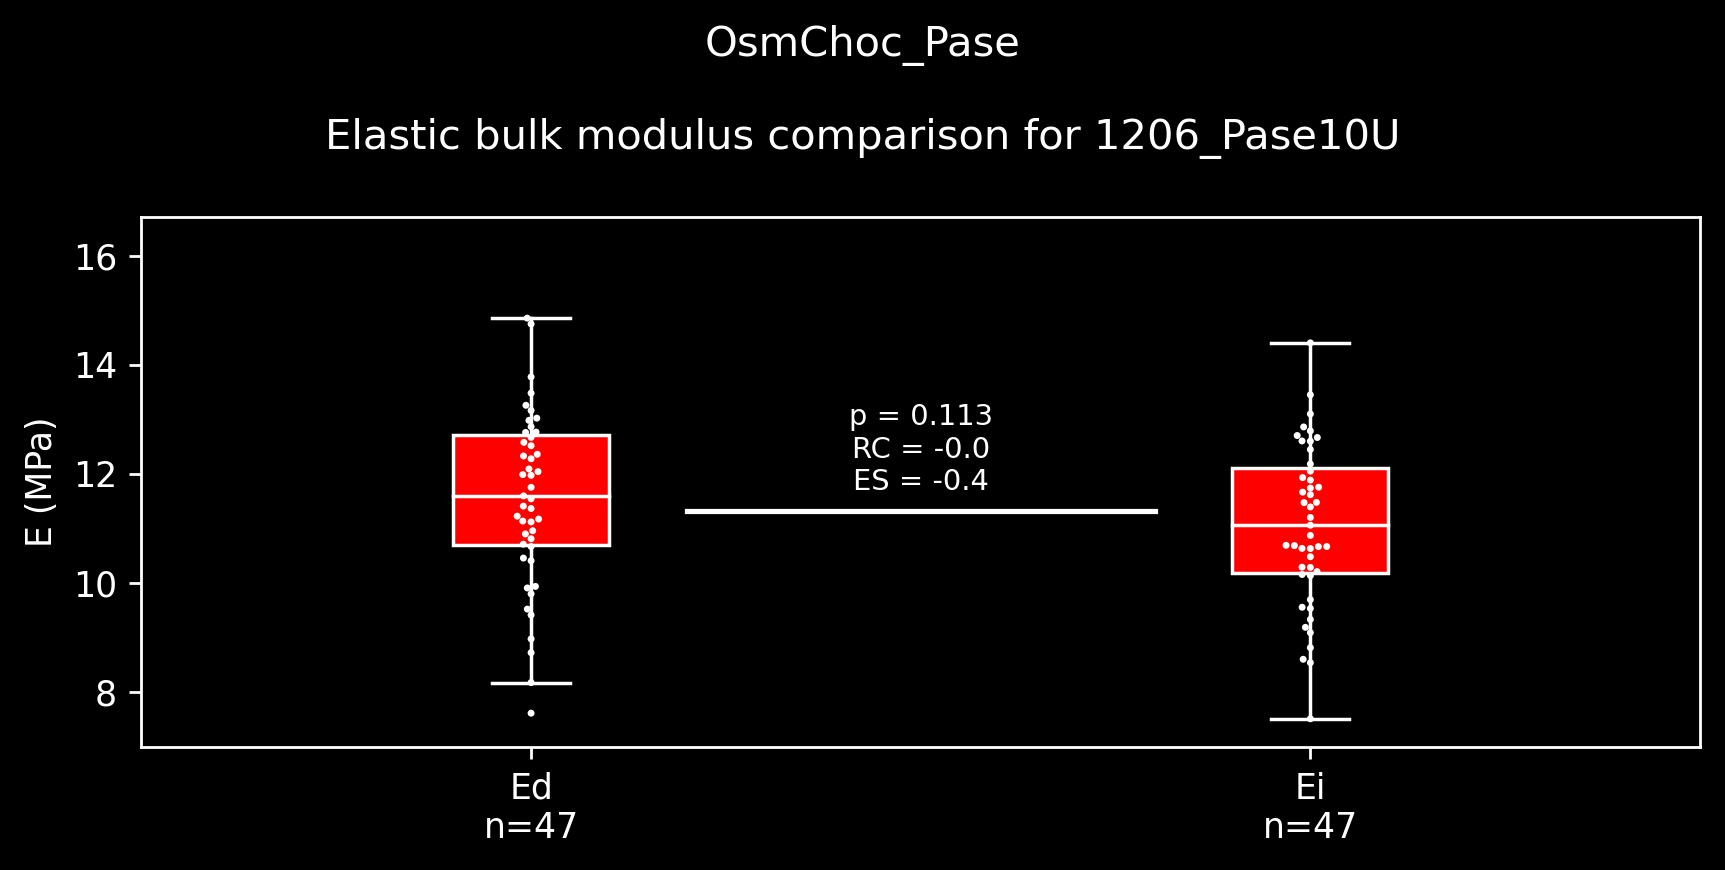

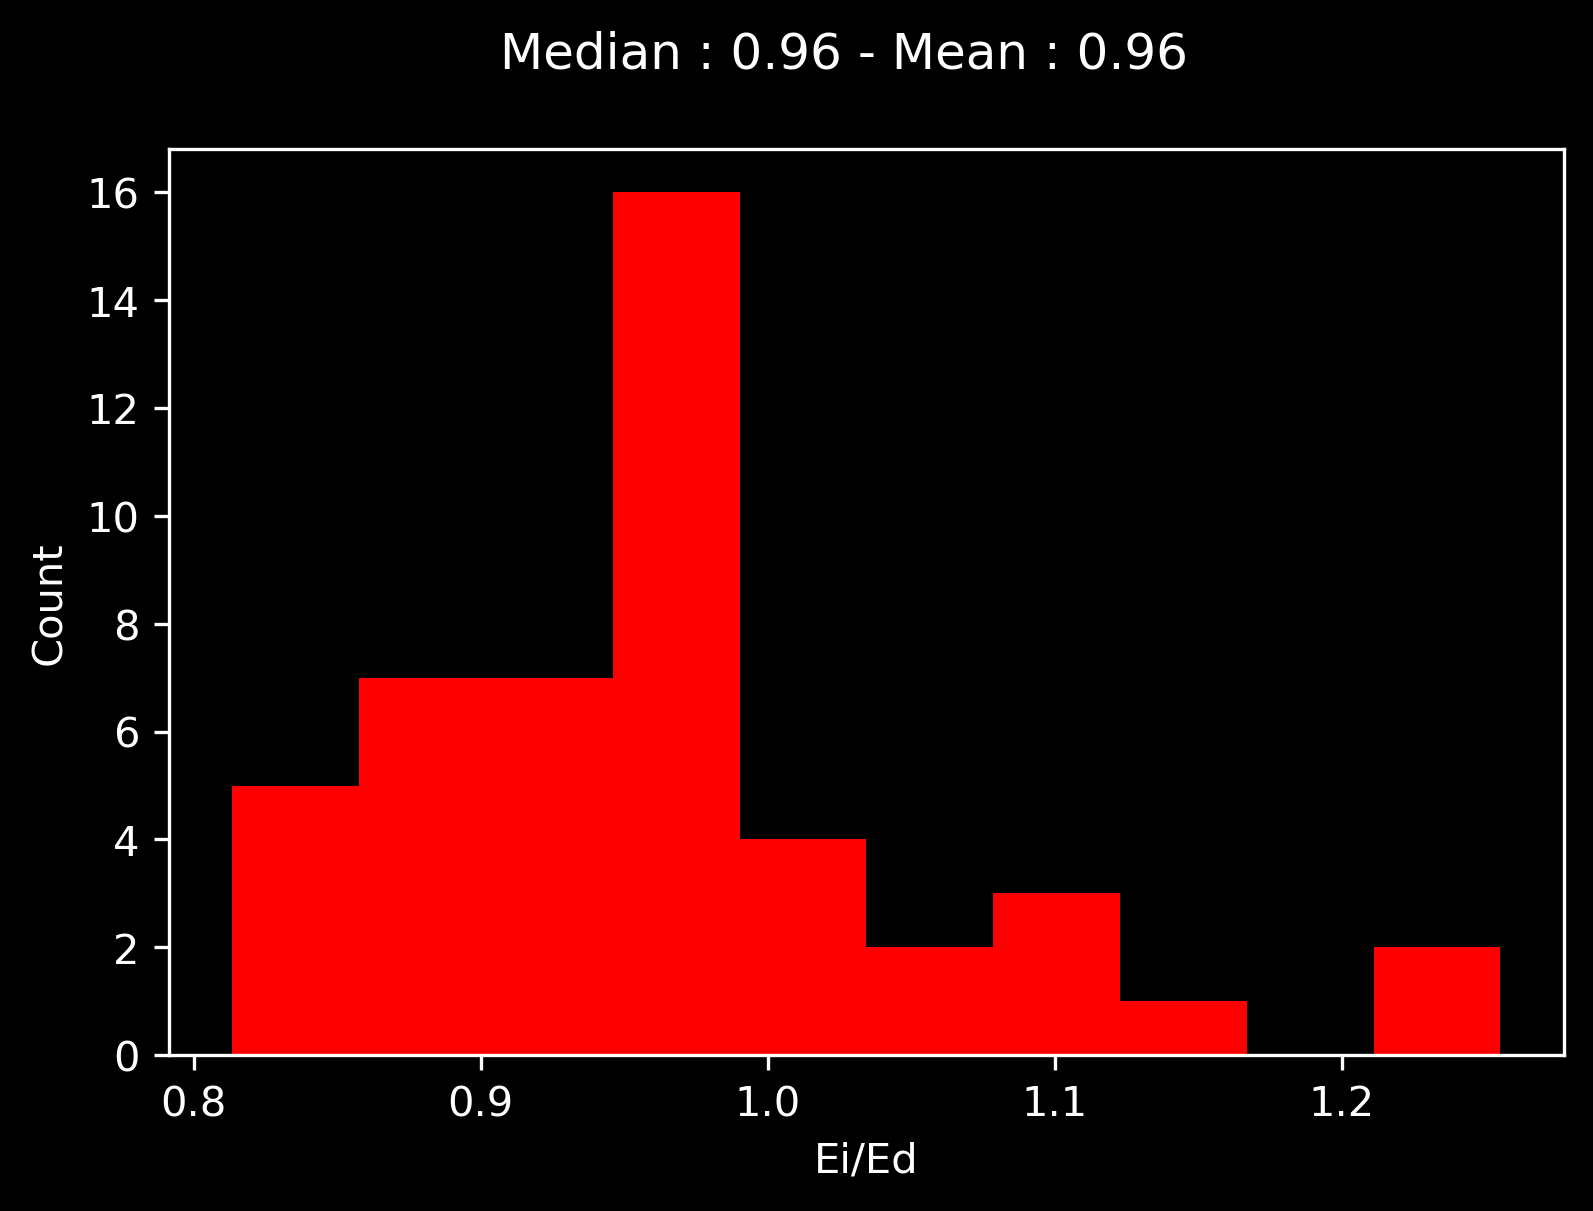

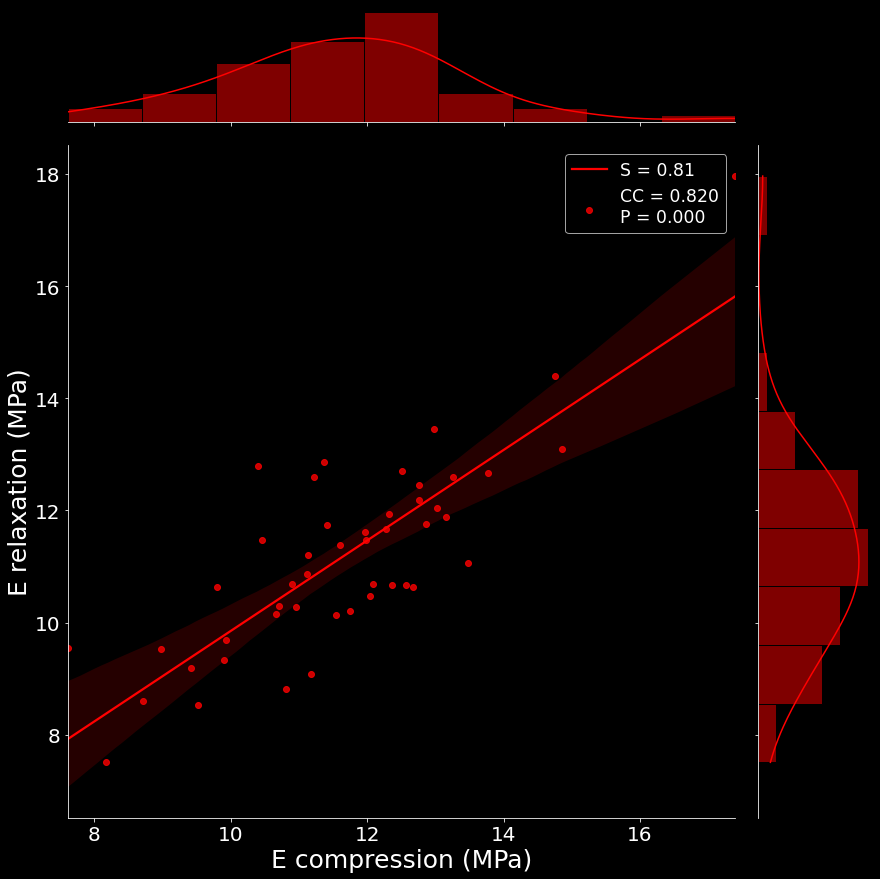

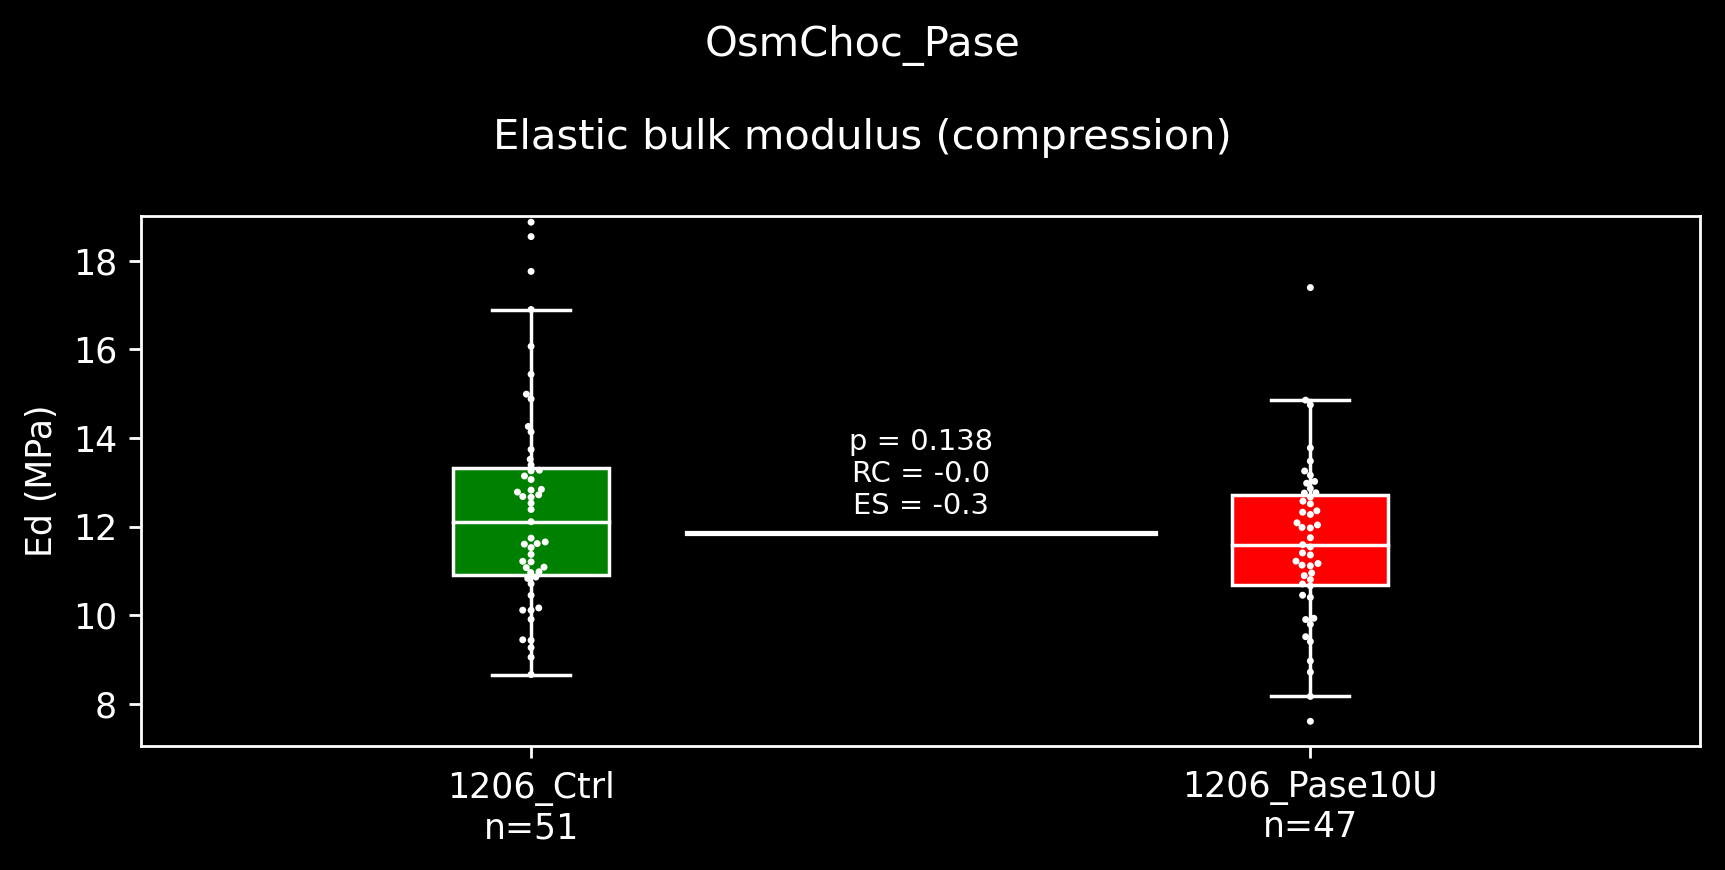

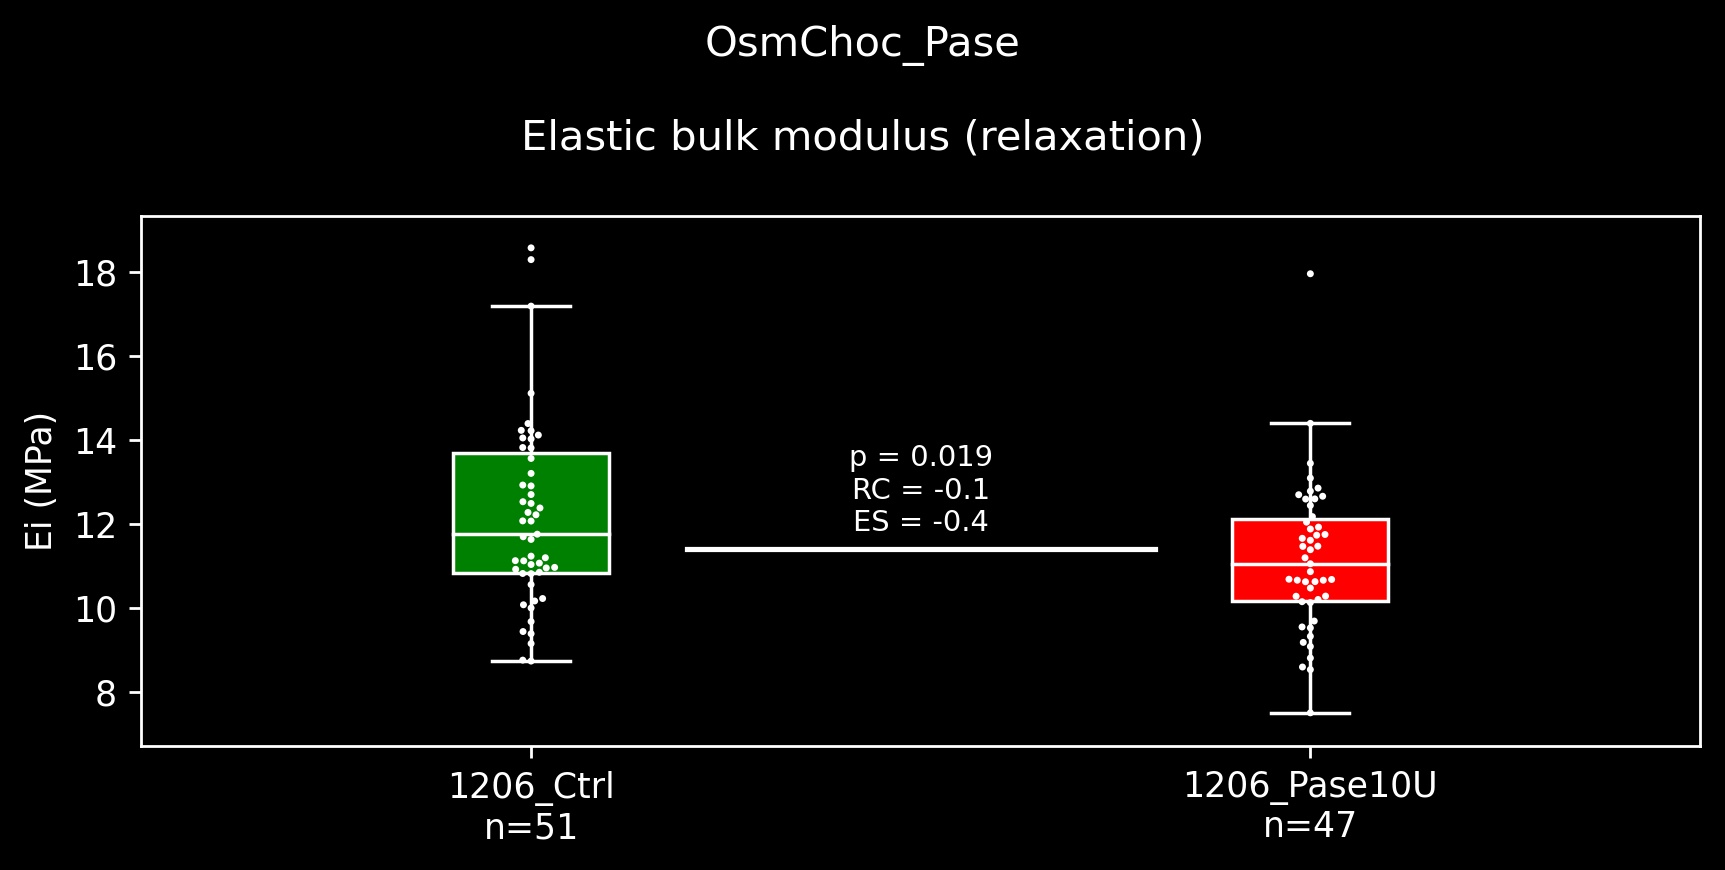

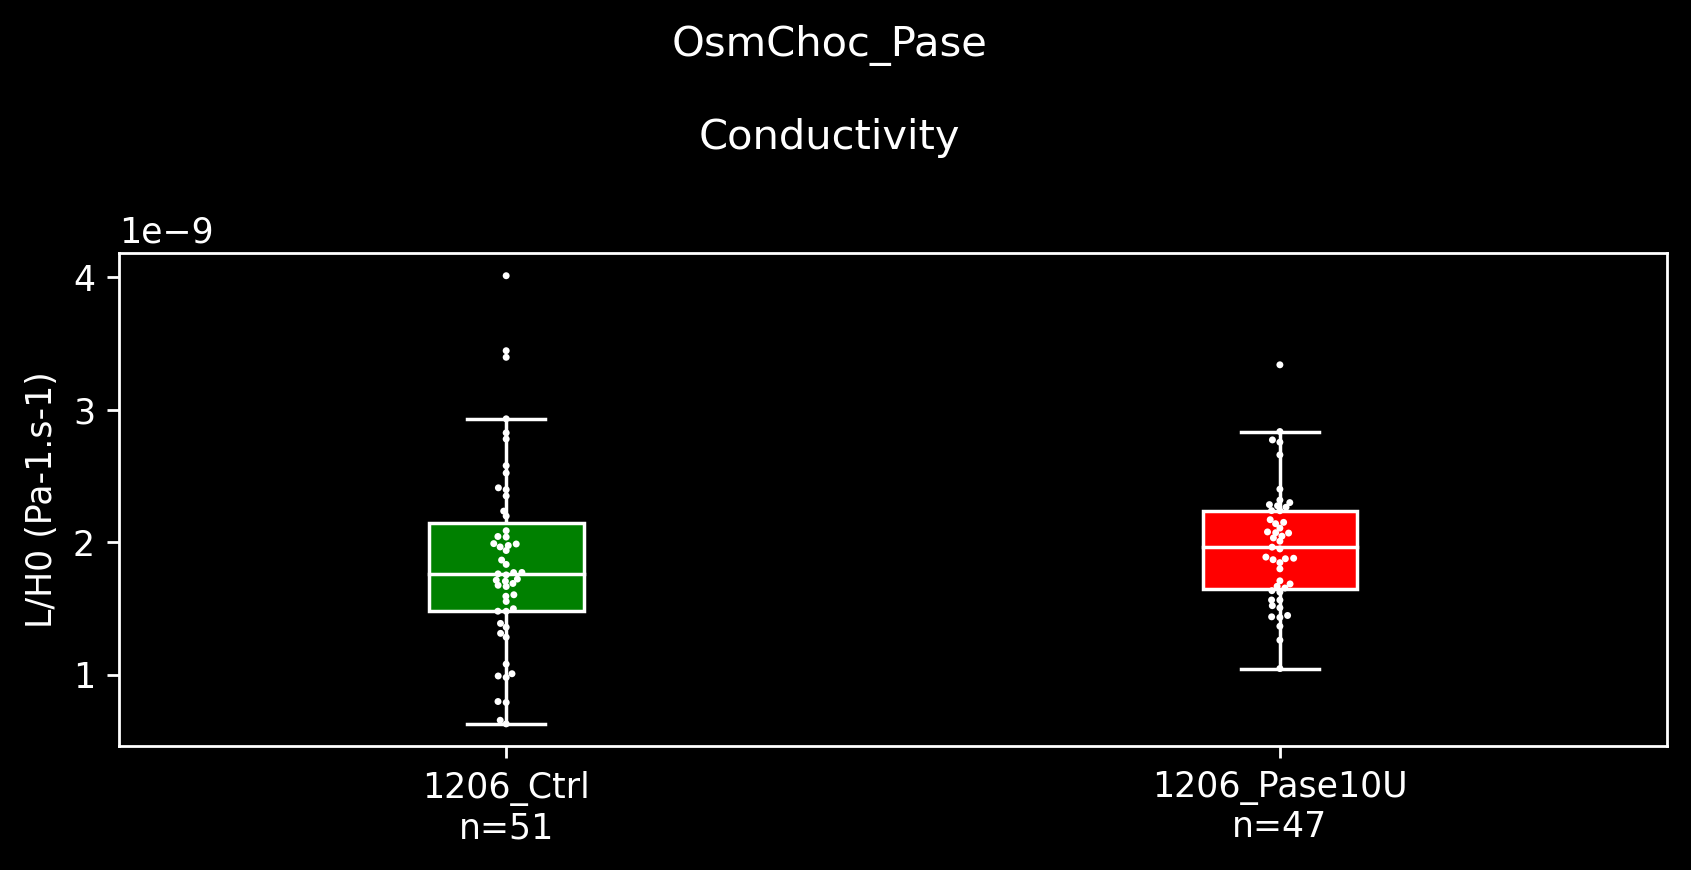

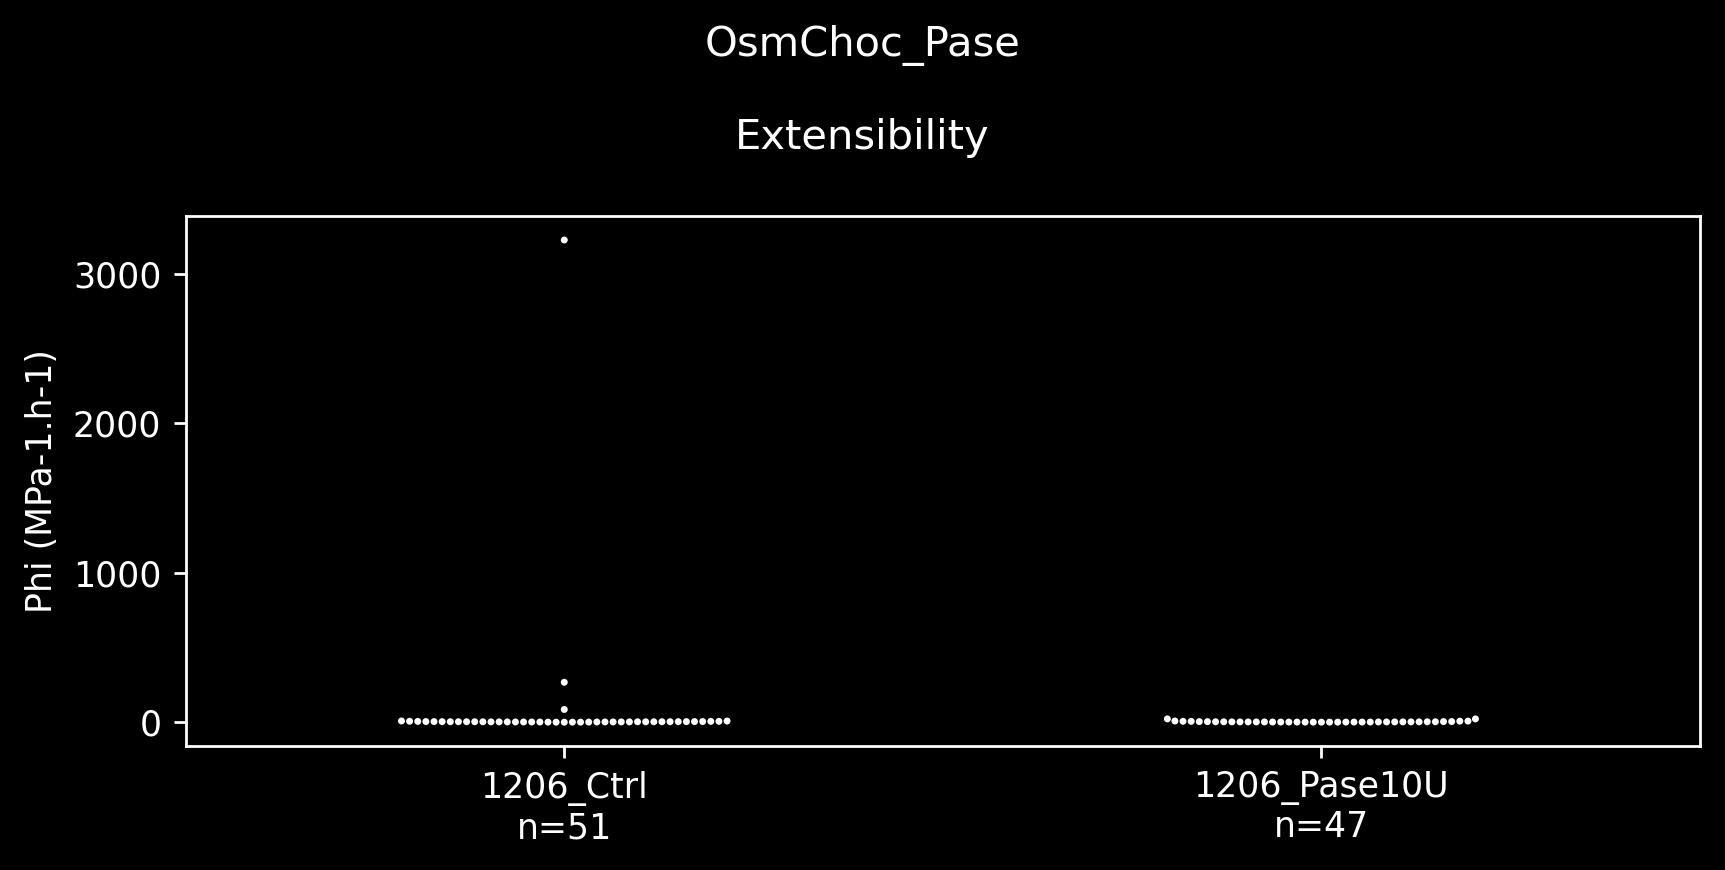

In [27]:
compareHydroMech([GlobalData221206_Ct_Osmo,GlobalData221206_Pase10U_Osmo],
             ['1206_Ctrl','1206_Pase10U'],['g','r'], 
             PFig, 'OsmChoc_Pase', showbox = True,showhist = True,stats='ranksum');

### 09-01-2023 : Pectinase growth test

In [28]:
# PlotGrowth([GlobalData230109_Ct,GlobalData230109_Pase5U,GlobalData230109_Pase10U],2,['Ctrl','Pectinase 5U','Pectinase 10U'],['g','m', 'r'])


# compareGrowth([GlobalData230109_Ct,GlobalData230109_Pase5U,GlobalData230109_Pase10U],
#              ['Ctrl','Pectinase 5U','Pectinase 10U'],[Blue, Green, DarkGreen],PFig, 'Pectinase effect', 
#               showcurve = True, showbox = True,showhist = True, nbins = 15,stats='ranksum',NimgMax = 'max');

### 21-02-2023 : ABA 3.5µM growth + OC

In [29]:

# compareGrowth([GlobalData230221_Ct,GlobalData230221_ABA],
#              ['Ctrl','ABA'],[Green, DarkGreen],PFig, 'ABA 3.5µM', 
#               showcurve = True, showbox = True,showhist = True, nbins = 15,stats='ranksum',NimgMax = 'max');

# compareGrowth([GlobalData220722_Ct, GlobalData220722_ABA,GlobalData220614_Ct, 
#                 GlobalData220614_ABA,GlobalData230221_Ct,GlobalData230221_ABA],
#                ['Ctrl\n','ABA 3.5 µM\n','Ctrl\n','ABA 3.5 µM\n','Ctrl\n','ABA 3.5 µM\n'],[Red,DarkRed,LightPurple,Purple,Green, DarkGreen],PFig, 'ABA_Growth',NimgMax = 'max',
#                 showcurve = True, showbox = True,showhist = True, nbins = 15,stats='ranksum',sigpairs=[(0,1),(2,3),(4,5)]);

# compareHydroMech([GlobalData230221_Ct_Osmo,GlobalData230221_ABA_Osmo],
#              ['Ctrl','ABA'],[Green, DarkGreen],PFig, 'ABA 3.5µM', showbox = True,showhist = True,stats='ranksum');


# GOC_Comp([GlobalData230221_Ct,GlobalData230221_ABA],
#          [GlobalData230221_Ct_Osmo,GlobalData230221_ABA_Osmo],
#          ['GR_end','Tau'],['A0','Ecomp','L/H0'],['GrowthRate (day-1)','Tau'],['Size (mm²)','E (MPa)','Conductivity'],
#          ['Ctrl','ABA'],[Blue,Green, DarkGreen],
#          PlotFits=True,CorrType = 'spearman',PlotStats=True)

### Bad data plots

#### Growth 03-02-2022

In [30]:
# #### Growth quantif
# GlobalData_Ct = GlobalData_Ct1.append(GlobalData_Ct2)

# compareGrowth([GlobalData_Ct1,GlobalData220203_Ct1],
#              ['GoodCtrls','Bad data 030222'],[DarkGreen, Blue], 
#              PFig, 'DV6 ctrls vs 030222', showcurve = False, showbox = True,showhist = True, nbins = 15,stats='ranksum');

# compareGrowth([GlobalData_Ct1,GlobalData220405_Ct1],
#              ['GoodCtrls','Bad data 050422'],[DarkGreen, Blue], 
#              PFig, 'DV6 ctrls vs 050422', showcurve = False, showbox = True,showhist = True, nbins = 15,stats='ranksum');



##### OC +100mM --> BAD data

In [31]:
# compareHydroMech([GlobalData220531_Ct1_Osmo, GlobalData220531_Ct2_Osmo],
#              ['Chamber 1','Chamber 2'],[DarkBlue,LightBlue], 
#              PFig, 'OsmChoc 31-05-2022', showbox = True,showhist = True, nbins = 'auto',stats='ranksum');



# GOC_Comp([GlobalData220531_Ct1,GlobalData220531_Ct2],[GlobalData220531_Ct1_Osmo,GlobalData220531_Ct2_Osmo],['Tau'],
#          ['E','Erel','H/L','H/L_Rel'],['Tau'],['E','Erel','H/L','H/L_Rel'],['3105_OC_Ct1','3105_OC_Ct2'],[Purple,Blue,Red],PlotFits=True)


# compareHydroMech([GlobalData220214_Ct1_Osmo, GlobalData220214_Ct2_Osmo,
#                   GlobalData220531_Ct1_Osmo, GlobalData220531_Ct2_Osmo],
#                  ['Chamber 1\n1402','Chamber 2\n1402','Chamber 1\n3105','Chamber 2\n3105'],
#                  [DarkPurple,LightPurple,DarkBlue,LightBlue], 
#              PFig, 'OsmChoc comparison', showbox = True,showhist = True, nbins = 'auto',stats='ranksum');

## Test zone
